Waste Classification

In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 11.6/11.6 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 346.6/346.6 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 8.0/8.0 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 219.8/219.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 39.5/39.5 MB 790.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 78.5/78.5 kB 875.6 kB/s eta 0:00:00


In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.2 MB 1.0 MB/s eta 0:06:12
   ---------------------------------------- 0.5/390.2 MB 1.0 MB/s eta 0:06:12
   ---------------------------------------- 0.5/390.2 MB 1.0 MB/s eta 0:06:12
   ---------------------------------------- 1.3/390.2 MB 1.1 MB/s eta 0:05:48
   ---------------------------------------- 1.8/390.2 MB 1.4 MB/s eta 0:04:46
   ---------------------------------------- 2.9/390.2 MB 1.9 MB/s eta 0:03:21
   ---------------------------------------- 3.9/390.2 MB 2.3 MB/s eta 0:02:48
   ---------------------------------------- 4.5/390.2 MB 2.4 MB/s eta 0:02:44
    --------------------------------------- 5.0/390.2 MB 2.4 MB/s eta 0:02:40
    --------------------------------------- 5.2/390.2 MB 2.3 MB/s eta 0:02:50


In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os
import tensorflow as tf

In [2]:
#Setting the path for the dataset
train_path = "dataset/TRAIN" 
test_path = "dataset/TEST"

In [3]:

#Setting the image size
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model

In [4]:
from glob import glob
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
#Setting the image size
x_data = []
y_data = []

In [6]:

#Reading the images
for category in glob(train_path+"/*"):

    for file in tqdm(glob(category+"/*")):

        img_array = cv2.imread(file)

        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, (224, 224))
        x_data.append(img_array)

        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [00:13<00:00, 721.81it/s]


In [8]:
#Checking the shape of the data
data.shape

(22564, 2)

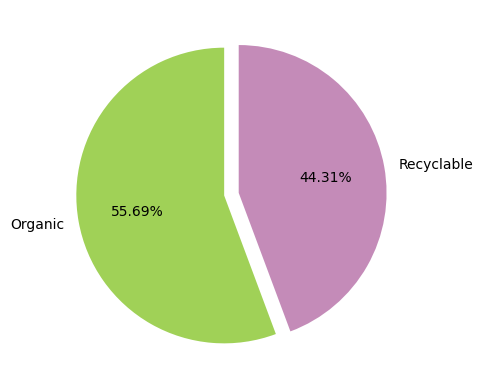

In [9]:
#Plotting a Pie chart
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

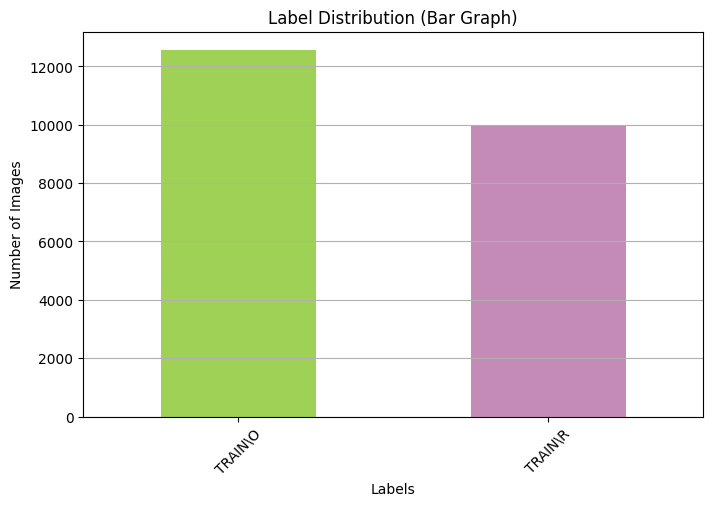

In [9]:
#Plotting a bar graph
label_counts = data['label'].value_counts()
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=colors)
plt.title("Label Distribution (Bar Graph)")
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

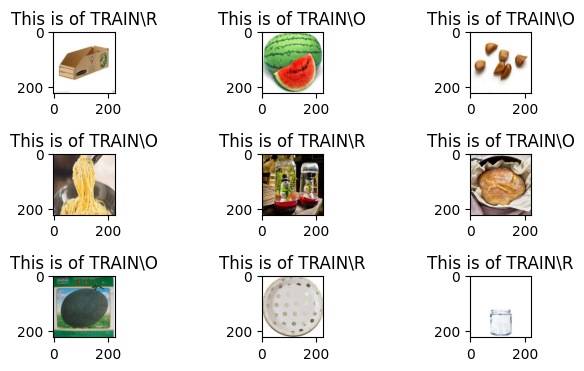

In [11]:
plt.Figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, i%12+1)
    index = np.random.randint(20000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 32

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,262,146 (84.92 MB)

 Trainable params: 22,261,698 (84.92 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [20]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/43.9 MB ? eta -:--:--
   - -------------------------------------- 1.6/43.9 MB 9.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/43.9 MB 6.3 MB/s eta 0:00:07
   ---- ----------------------------------- 4.5/43.9 MB 7.3 MB/s eta 0:00:06
   ----- ---------------------------------- 6.6/43.9 MB 8.1 MB/s eta 0:00:05
   ------- -------------------------------- 7.9/43.9 MB 7.7 MB/s eta 0:00:05
   -------- ------------------------------- 9.7/43.9 MB 8.3 MB/s eta 0:00:05
   ---------- ----------------------------- 11.8/43.9 MB 8.3 MB/s eta 0:00:04
   ----------- ---------------------------- 12.8/43.9 MB 7.9 MB/s eta 0:00:04
   ------------- -------------------------- 14.4/43.9 MB 8.2 MB/s eta 0:00:04
   --------------- ------------------------ 16.8/43.9 MB 8.1 MB/s eta 0:00:04
   ---------------- ----------------------- 18.4/43.9 MB 8.2 MB/s eta 0:00:04



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=50,  
    callbacks=[early_stopping, model_checkpoint])

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7326 - loss: 3.2498

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


705/705 ━━━━━━━━━━━━━━━━━━━━ 1598s 2s/step - accuracy: 0.7326 - loss: 3.2477 - val_accuracy: 0.8734 - val_loss: 0.3661
Epoch 2/50
  1/705 ━━━━━━━━━━━━━━━━━━━━ 33:20 3s/step - accuracy: 0.6875 - loss: 0.5346

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


705/705 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.6875 - loss: 0.5346 - val_accuracy: 0.8750 - val_loss: 0.3625
Epoch 3/50
442/705 ━━━━━━━━━━━━━━━━━━━━ 9:59 2s/step - accuracy: 0.8108 - loss: 0.4474 

KeyboardInterrupt: 